In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import os
import pickle
import sys

%matplotlib inline

In [2]:
# load sleep features
allFeatures = np.load('sleepFeatures.npy')

In [3]:
# normalise the values between a 0 1 range
normalisedFeatures = []
for features in allFeatures:
    min_max_scalar = preprocessing.MinMaxScaler()
    normalise = min_max_scalar.fit_transform(features)
    normalisedFeatures.append(normalise)

//anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
//anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
//anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

In [4]:
for i in normalisedFeatures[0]:
    print(i, end=' ')

0.00223164961614 0.00240187932007 0.00224218167552 0.00173031128173 0.00223700568579 0.0018842027384 0.0017103262002 0.00171185699123 0.00222481146194 0.00188633169254 0.00208792451488 0.00204225372599 0.00179478719848 0.00185070018467 0.00170464827222 0.00199079318157 0.00174978789904 0.00198700006468 0.0017178239993 0.0019889986128 0.00177226970758 0.00171926493617 0.00171808589602 0.00194148557576 0.00177161628796 0.00177613039228 0.00180038520953 0.00178282428597 0.00181521891441 0.00170464827222 0.000947831283677 0.000488598950116 0.000908619608476 0.00477912276906 0.000927641944452 0.000939096113152 0.00862465321102 0.0104378317089 0.000930209528497 0.000934040837959 0.00152105476752 0.00154055103401 0.00484485842821 0.00300424717312 0.00170464827222 0.00110886645946 0.00539573850742 0.00118887686687 0.0537599397046 0.00114831735699 0.00157238692007 0.0827710879278 0.135949097623 0.00115008862519 0.00158166226688 0.00605534654985 0.00199307645942 0.0179029149401 0.0040550704206 0

In [5]:
# search for csv location

found = []

def find(name,path):
    path = os.getcwd() + path
    file = name

    for root, dir, files in os.walk(path):
        for item in files:
            if file == item:
                return os.path.join(root, file)
        return None

In [6]:
# load sleep diaries

path = find('Sleep Data Research - ASD Morning.csv','/irc-sphere-sleep-56db93f64661/Sphere-csv-data/')

if path is not None:
    if 'gz' in path:
        fileName = path
        data = pd.read_csv(path, skiprows=1, index_col='Participant', compression='gzip')
    else: 
        data = pd.read_csv(path, skiprows=1, index_col='Participant')
data

,Date,Time in Bed,Time to Sleep,Time to fall asleep (minutes),Wake up time,Time to get up,Quality of Sleep,How Refreshed,Normal Night,Comments
Participant,,,,,,,,,,
1,01/06,23:00,23:30,5,07:00,07:00,Poor,Somewhat,Yes,-
1,02/06,23:30,00:00,5,06:30,06:30,Fair,Somewhat,Yes,-
1,03/06,23:00,23:30,5,07:00,07:00,Fair,Somewhat,Yes,-
14,20/04,23:00,23:10,60,08:20,08:25,Fair,Refreshed,No,woken by very noisy birds in the morning
14,21/04,22:30,23:00,60,07:55,08:00,Fair,Refreshed,No,Car alarm went off in the night
14,22/04,23:30,00:30,30,08:50,08:50,Good,Refreshed,Yes,NaN
14,23/04,23:30,01:30,20,08:40,10:00,Very Good,Refreshed,Yes,NaN
14,24/04,23:00,01:30,15,10:00,10:15,Very Good,Refreshed,Yes,NaN
14,25/04,23:00,01:30,60,08:20,08:20,Good,Refreshed,Yes,NaN


In [7]:
# convert 'Quality of Sleep' to numeric labels
allLabels = []
for d in data['Quality of Sleep']:
    if(d == 'Poor'):
        allLabels.append(0)
    elif(d == 'Fair'):
        allLabels.append(1)
    elif(d == 'Good'):
        allLabels.append(2)
    else:
        allLabels.append(3)

# get only labels for trainingData
labels = []
for i in range(len(allFeatures)):
    labels.append(allLabels[i])

In [8]:
predictions = []

for i,n in enumerate(normalisedFeatures):
    feature = np.delete(normalisedFeatures, i, axis=0)
    lbl = np.delete(labels, i)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(feature, lbl)
    predict = knn.predict(normalisedFeatures[i])
    predictions.append(predict)

//anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaco

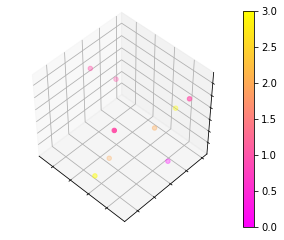

In [19]:
# make PCA (dimensionality reduction) to 3D and plot
# with TRUE labels
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(allFeatures)
X = pca.transform(allFeatures)

# only needed for non int labels (I think)
# y = np.choose(label, [1, 2, 0]).astype(np.float)

pca_plot = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='spring') # alt. cmap='spring'
fig.colorbar(pca_plot, ax=ax)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.savefig('classified')
plt.show()

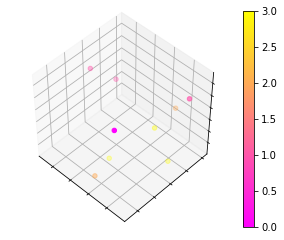

In [10]:
# make PCA (dimensionality reduction) to 3D and plot
# with PREDICTED labels
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(allFeatures)
X = pca.transform(allFeatures)

# only needed for non int labels (I think)
# y = np.choose(label, [1, 2, 0]).astype(np.float)

pca_plot = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=predictions, cmap='spring') # alt. cmap='spring'
fig.colorbar(pca_plot, ax=ax)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.savefig('classified2', dpi=500)
plt.show()

In [11]:
def reverseMap(label):
    if(label == 0):
        return 'Poor'
    if(label == 1):
        return 'Fair'
    if(label == 2):
        return 'Good'
    else:
        return 'Very good'

In [12]:
for i,n in enumerate(labels):
    pred = predictions[i][0]
    myStr = 'hello'
    if(not(pred == n)):
        myStr = '. You fucked up!'
    else:
        myStr = '. Well done! (lucky..)'
    print('In night ' + str(i) + ' the quality ' + reverseMap(n) + ' is predicted as ' + reverseMap(pred) + myStr)

In night 0 the quality Poor is predicted as Very good. You fucked up!
In night 1 the quality Fair is predicted as Poor. You fucked up!
In night 2 the quality Fair is predicted as Fair. Well done! (lucky..)
In night 3 the quality Fair is predicted as Fair. Well done! (lucky..)
In night 4 the quality Fair is predicted as Fair. Well done! (lucky..)
In night 5 the quality Good is predicted as Very good. You fucked up!
In night 6 the quality Very good is predicted as Good. You fucked up!
In night 7 the quality Very good is predicted as Good. You fucked up!
In night 8 the quality Good is predicted as Very good. You fucked up!


In [13]:
predictions, labels

([array([3]),
  array([0]),
  array([1]),
  array([1]),
  array([1]),
  array([3]),
  array([2]),
  array([2]),
  array([3])],
 [0, 1, 1, 1, 1, 2, 3, 3, 2])